In [21]:
# --- 1. Imports ---
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [22]:
# --- 2. Device ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [23]:
# --- 3. Data Directories ---
data_dir = r'D:\00_google_classroom\pytorch\PlantVillage'


In [24]:
from sklearn.model_selection import train_test_split
import shutil

# --- 3.1. Split Dataset into Train/Valid/Test Folders ---
splitted_data_dir = r'D:\00_google_classroom\pytorch'

def split_dataset(source_dir, dest_dir, train_ratio=0.7, valid_ratio=0.15, test_ratio=0.15, seed=42):
    random.seed(seed)
    np.random.seed(seed)
    classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    for split in ['train', 'valid', 'test']:
        split_path = os.path.join(dest_dir, split)
        os.makedirs(split_path, exist_ok=True)
        for cls in classes:
            os.makedirs(os.path.join(split_path, cls), exist_ok=True)

    for cls in classes:
        cls_dir = os.path.join(source_dir, cls)

        images = [f for f in os.listdir(cls_dir) if os.path.isfile(os.path.join(cls_dir, f))]

        train_imgs, temp_imgs = train_test_split(images, test_size=(1-train_ratio), random_state=seed)

        valid_imgs, test_imgs = train_test_split(temp_imgs, test_size=test_ratio/(test_ratio+valid_ratio), random_state=seed)

        splits = {'train': train_imgs, 'valid': valid_imgs, 'test': test_imgs}

        for split, split_imgs in splits.items(): # split_imgs is a list of images for each split
            for img in split_imgs:
                src = os.path.join(cls_dir, img)
                dst = os.path.join(dest_dir, split, cls, img)
                shutil.copy2(src, dst)

split_dataset(data_dir, splitted_data_dir)
print("Dataset split completed.")

Dataset split completed.


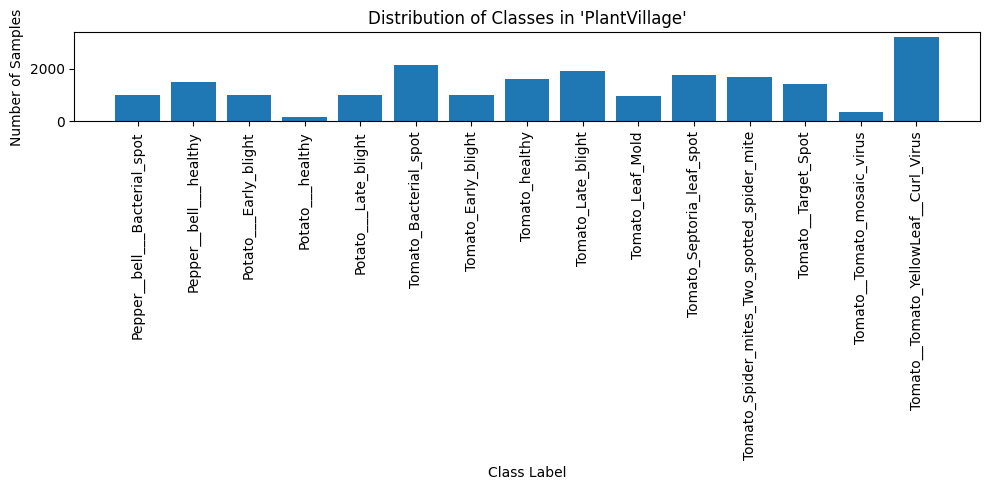

In [25]:
class_counts = {}
for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))])

plt.figure(figsize=(10,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
# --- 4. Image Transformations ---
img_size = 128
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # normalize to [-1, 1] output = (input - mean) / std  ([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  Rescales [0–1] to [-1, 1] 
])

## Normalization

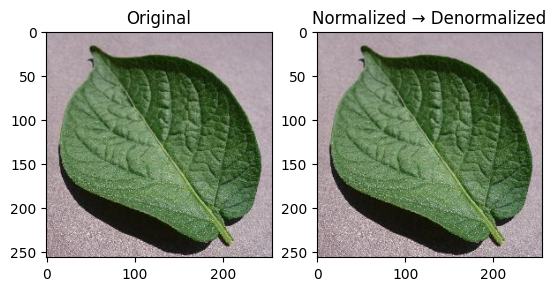

In [27]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('D:\\00_google_classroom\\pytorch\\PlantVillage\\Potato___healthy\\0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG').convert("RGB")

to_tensor = transforms.ToTensor()
normalize = transforms.Normalize([0.5]*3, [0.5]*3)

img_tensor = to_tensor(img)
norm_tensor = normalize(img_tensor)

# Reverse normalization
denorm_tensor = norm_tensor * 0.5 + 0.5

# Plot
plt.subplot(1, 2, 1)
plt.imshow(img_tensor.permute(1, 2, 0))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(denorm_tensor.permute(1, 2, 0))
plt.title("Normalized → Denormalized")

plt.show()


In [ ]:
import torch

# Integer tensor (default dtype: int64)
int_tensor = torch.tensor([100, 150, 200])
print("Integer tensor:", int_tensor, "| dtype:", int_tensor.dtype)

# Float tensor (default dtype: float32)
float_tensor = torch.tensor([0.5, 0.8, 0.2])
print("Float tensor:", float_tensor, "| dtype:", float_tensor.dtype)

# Simulate an RGB pixel in [0, 1]
pixel = torch.tensor([0.8, 0.6, 0.4])
mean = torch.tensor([0.5, 0.5, 0.5])
std = torch.tensor([0.5, 0.5, 0.5])

# Manual normalization
normalized_pixel = (pixel - mean) / std
print("Normalized pixel:", normalized_pixel)

# Using torchvision Normalize (for comparison)
from torchvision import transforms
normalize = transforms.Normalize([0.5]*3, [0.5]*3)

# Reshape pixel to (C, H, W) for Normalize
pixel_reshaped = pixel.view(3, 1, 1) # 1D tensor type 
normalized_pixel_torchvision = normalize(pixel_reshaped)
print("Normalized pixel (torchvision):", normalized_pixel_torchvision.view(3))

Integer tensor: tensor([100, 150, 200]) | dtype: torch.int64
Float tensor: tensor([0.5000, 0.8000, 0.2000]) | dtype: torch.float32
Normalized pixel: tensor([ 0.6000,  0.2000, -0.2000])
Normalized pixel (torchvision): tensor([ 0.6000,  0.2000, -0.2000])


## --- Load Datasets ---

In [29]:

# --- 5. Load Datasets ---
batch_size = 32
train_dataset = datasets.ImageFolder(root=os.path.join(splitted_data_dir, "train"), transform=transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(splitted_data_dir, "valid"), transform=transform)
test_dataset  = datasets.ImageFolder(root=os.path.join(splitted_data_dir, "test"),  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Classes: {train_dataset.classes}")

Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


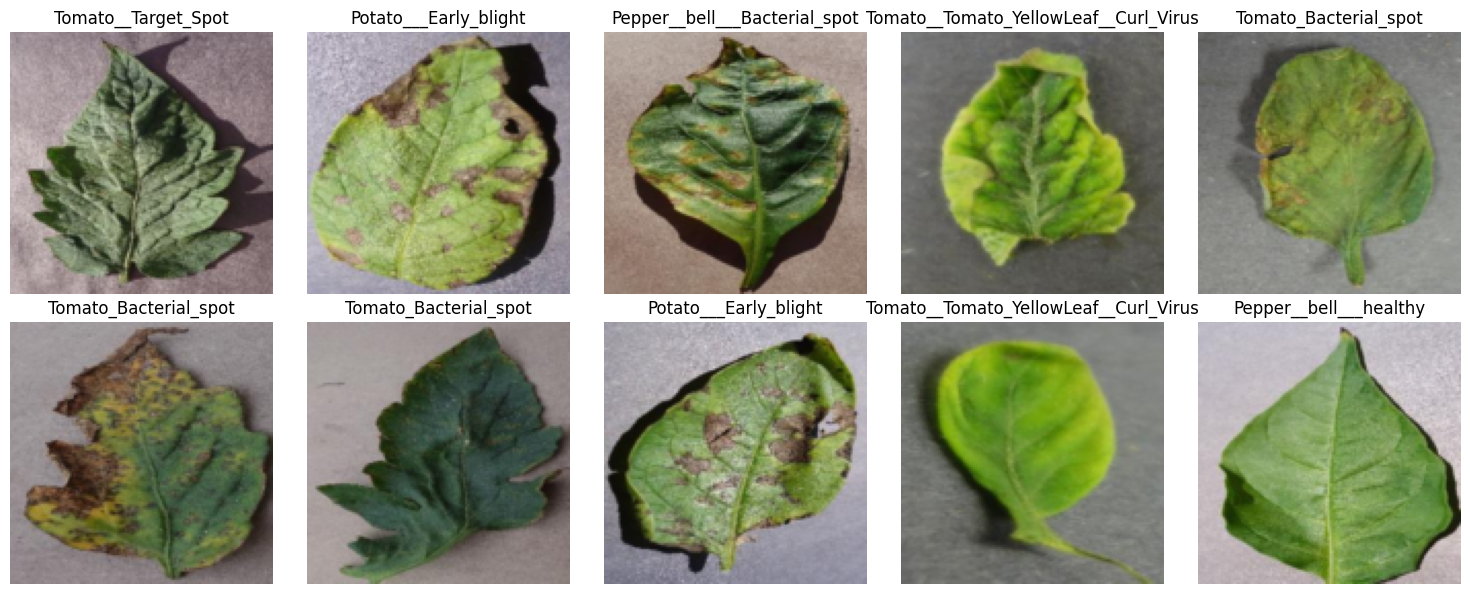

In [30]:
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = img * 0.5 + 0.5  # unnormalize if normalized from [-1, 1]
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

plt.figure(figsize=(15, 6))
for i in range(10):
    idx = random.randint(0, len(train_dataset) - 1)
    img, label = train_dataset[idx]
    plt.subplot(2, 5, i+1)
    imshow(img, title=train_dataset.classes[label])
plt.tight_layout()
plt.show()

# --- Model Definition ---

In [32]:


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*16*128, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x))) # 64x64x32 
        x = self.pool(torch.relu(self.conv2(x))) # 32x32x64
        x = self.pool(torch.relu(self.conv3(x))) # 16x16x128
        x = x.view(x.size(0), -1)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model = SimpleCNN(num_classes=len(train_dataset.classes)).to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=15, bias=True)
)


In [33]:
# --- 8. Loss and Optimizer ---
criterion = nn.CrossEntropyLoss() #Negative log 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
# --- 9. Training and Validation Functions ---
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1) 
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [36]:
# --- 10. Training Loop ---
num_epochs = 10
train_losses, val_accuracies = [], []
train_accuracies, val_losses = [], []

def compute_loss(model, loader, criterion):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    return running_loss / len(loader)

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = compute_loss(model, valid_loader, criterion)
    train_acc = evaluate(model, train_loader)
    val_acc = evaluate(model, valid_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    checkpoint_path = f"plant_cnn_epoch{epoch+1}.pth"
    torch.save(model.state_dict(), checkpoint_path)
    print(f"Model saved to {checkpoint_path}")

Epoch 1/10, Train Loss: 1.1116, Train Acc: 0.8291, Val Loss: 0.6006, Val Acc: 0.8056
Model saved to plant_cnn_epoch1.pth
Epoch 2/10, Train Loss: 0.5319, Train Acc: 0.9160, Val Loss: 0.3817, Val Acc: 0.8857
Model saved to plant_cnn_epoch2.pth
Epoch 3/10, Train Loss: 0.3524, Train Acc: 0.9591, Val Loss: 0.2672, Val Acc: 0.9270
Model saved to plant_cnn_epoch3.pth
Epoch 4/10, Train Loss: 0.2730, Train Acc: 0.9609, Val Loss: 0.3044, Val Acc: 0.9115
Model saved to plant_cnn_epoch4.pth
Epoch 5/10, Train Loss: 0.2004, Train Acc: 0.9731, Val Loss: 0.2811, Val Acc: 0.9264
Model saved to plant_cnn_epoch5.pth
Epoch 6/10, Train Loss: 0.1930, Train Acc: 0.9799, Val Loss: 0.2491, Val Acc: 0.9370
Model saved to plant_cnn_epoch6.pth
Epoch 7/10, Train Loss: 0.1564, Train Acc: 0.9868, Val Loss: 0.2893, Val Acc: 0.9361
Model saved to plant_cnn_epoch7.pth
Epoch 8/10, Train Loss: 0.1478, Train Acc: 0.9934, Val Loss: 0.2488, Val Acc: 0.9416
Model saved to plant_cnn_epoch8.pth
Epoch 9/10, Train Loss: 0.1033, 

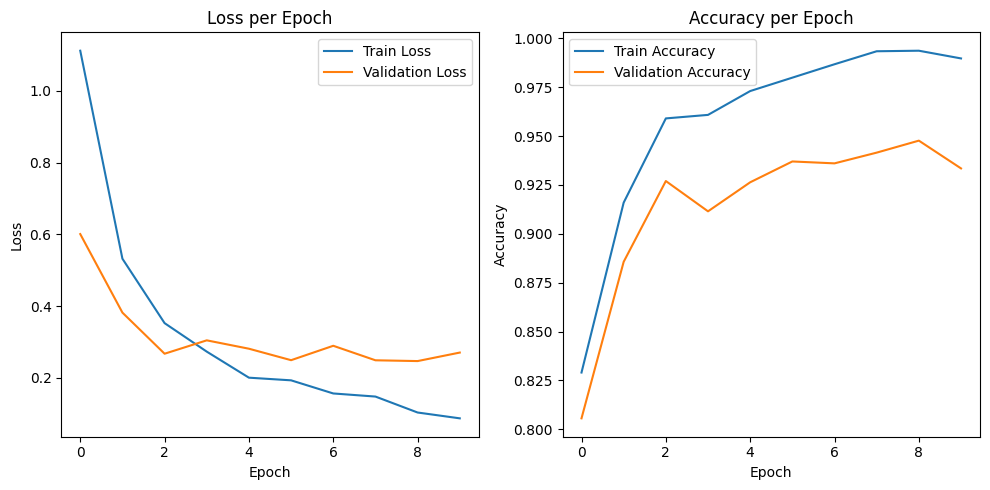

In [37]:
# --- 11. Plot Training History ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

plt.tight_layout()
plt.show()

In [39]:
# --- 12. Testing and Evaluation ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))



Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.84      0.91      0.87       150
                     Pepper__bell___healthy       0.93      0.98      0.95       222
                      Potato___Early_blight       0.94      0.97      0.95       151
                       Potato___Late_blight       0.93      0.83      0.88       151
                           Potato___healthy       0.78      0.78      0.78        23
                      Tomato_Bacterial_spot       0.94      0.98      0.96       320
                        Tomato_Early_blight       0.84      0.80      0.82       151
                         Tomato_Late_blight       0.94      0.82      0.88       287
                           Tomato_Leaf_Mold       0.96      0.91      0.93       143
                  Tomato_Septoria_leaf_spot       0.82      0.97      0.89       266
Tomato_Spider_mites_Two_spotted_spider_m

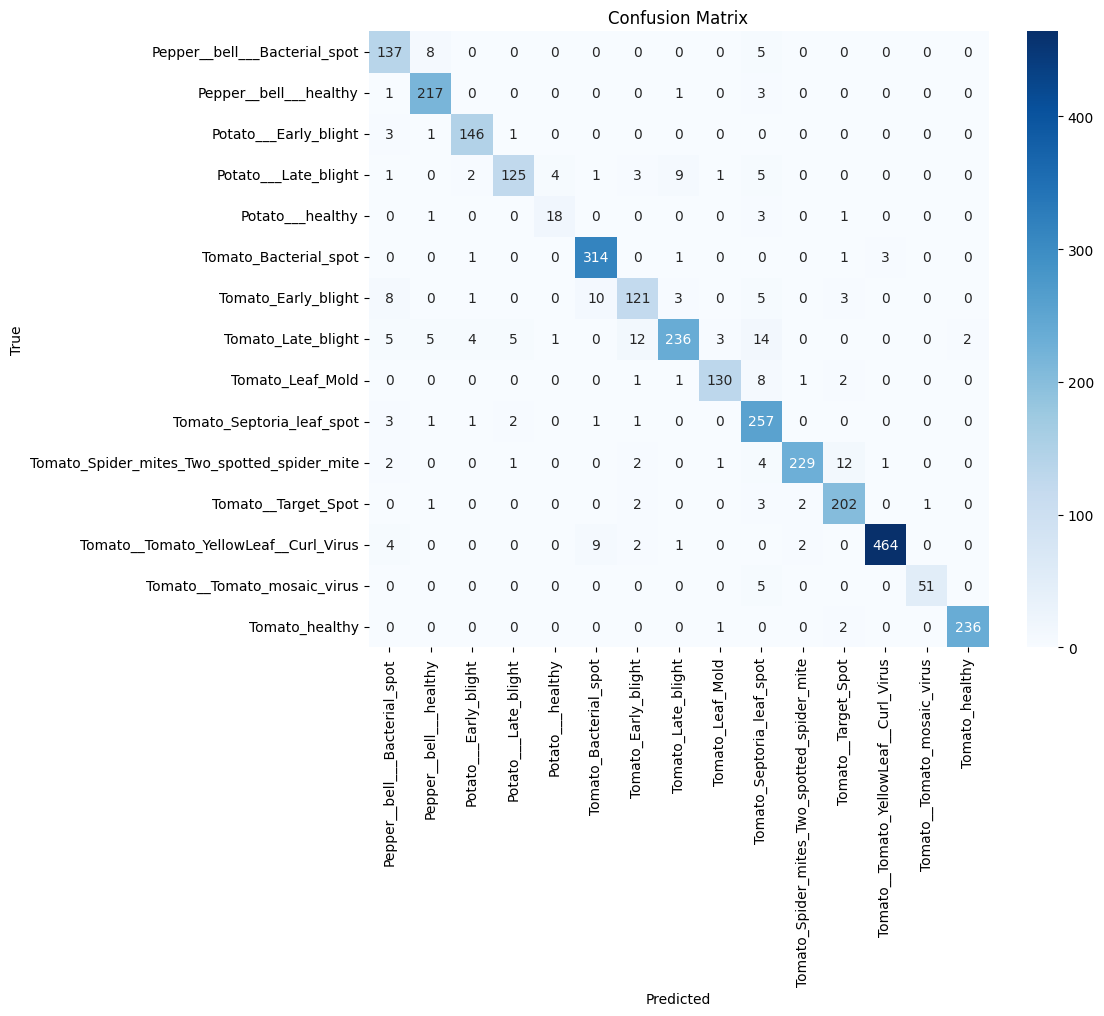

In [42]:
# --- 13. Confusion Matrix ---
import seaborn as sns
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

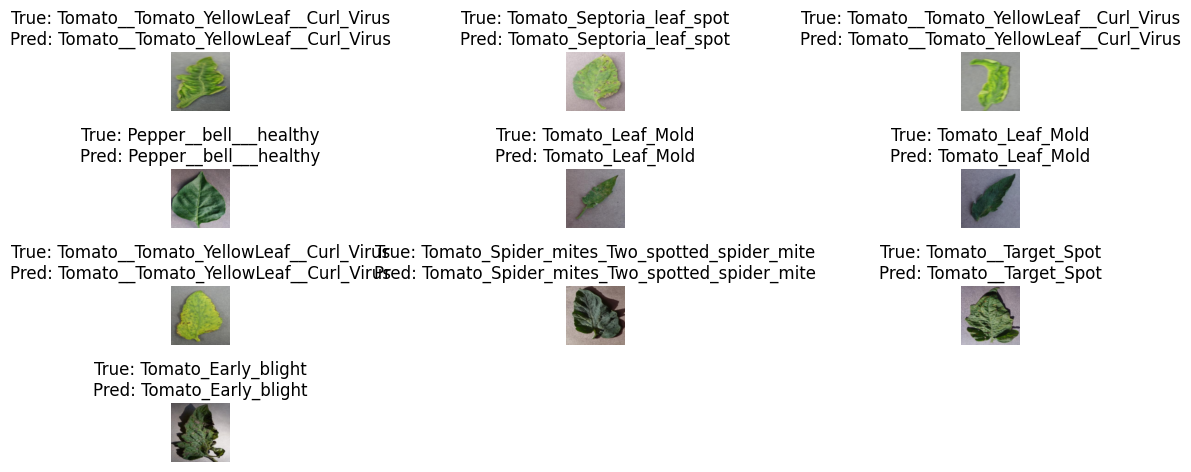

In [62]:
# --- 14. Show Random Sample Predictions from Test Set ---
def show_random_predictions(model, dataset, class_names, num_images=10):
    model.eval()
    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(dataset)), num_images)
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, label = dataset[idx]
            input_img = img.unsqueeze(0).to(device)
            output = model(input_img)
            _, pred = torch.max(output, 1)
            img_disp = img.cpu()
            true_label = class_names[label]
            pred_label = class_names[pred.item()]
            plt.subplot( num_images//2,3, i+1)
            imshow(img_disp, title=f"True: {true_label}\nPred: {pred_label}")
    plt.tight_layout()
    plt.show()

show_random_predictions(model, test_dataset, train_dataset.classes, num_images=10)